In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


In [ ]:
N=2
D=5
X, y = make_blobs(n_samples=100, centers=N, n_features=D, random_state=1, cluster_std=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
df=pd.DataFrame(X_train)
df['Class']=y_train


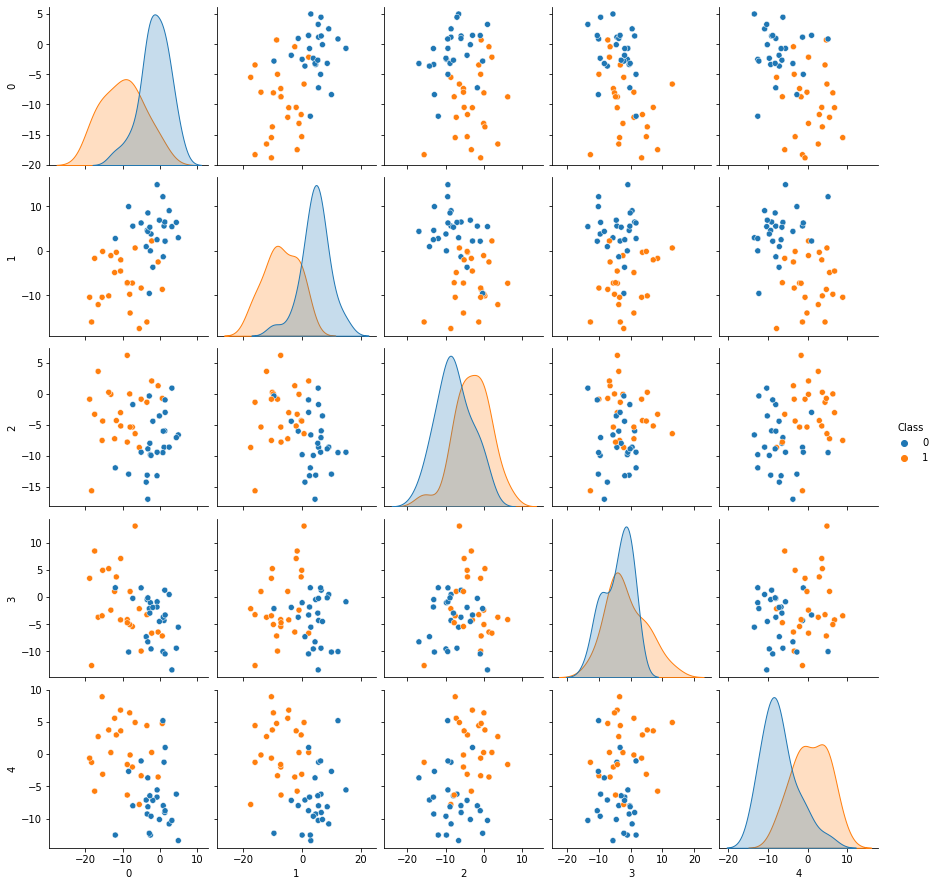

In [ ]:
sns.pairplot(df, hue='Class')

In [ ]:
model=tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10, max_depth=5)
model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

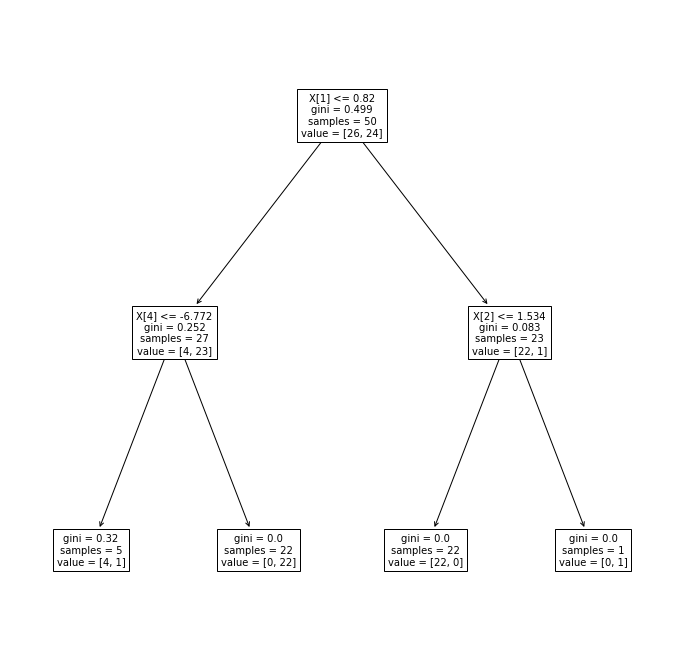

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=10)
plt.show()


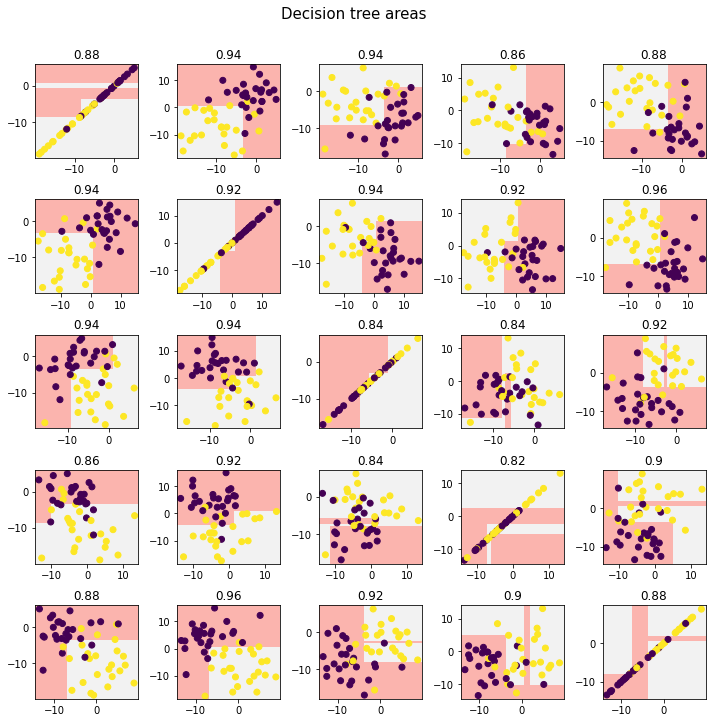

In [ ]:
def DT(field1, field2, k): #процедура рисования "решающих поверхностей"
    splot=plt.subplot(D,D,k)
    x=df[[field1, field2]].values #определим данные
    df['Class'] = y_train #определим результирующий признак
    model_pair=tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10, max_depth=5)
    model_pair.fit(x,y_train)
   	#определим минимальные и максимальные значения в данных для большей информативности диаграмм
    min1, max1 = df[field1].min()-1, df[field1].max()+1
    min2, max2 = df[field2].min()-1, df[field2].max()+1
    #определим все строки и столбцы области отрисовки
    X = np.linspace(min1, max1, 200)
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)
    # #определим значения "решающих поверхностей"
    ZZ = np.array([model_pair.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    #отрисуем поверхности и данные
    plt.pcolormesh(X, Y, Z,cmap='Pastel1')
    #Выведем значения
    plt.scatter(df[field1],df[field2],c=y_train)
    #оценка точности модели
    plt.title(model_pair.score(x,y_train))
    return splot


plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Decision tree areas ',y=1, fontsize=15)
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        splot=DT(i, j, k)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [ ]:
model.score(X_test,y_test)

0.92